In [1]:
import faceted
import matplotlib
import pandas as pd
import seaborn as sns
import xarray as xr

import plotting

from typing import Tuple

In [2]:
plotting.configure_style()

REFERENCE = "SHiELD-SOM-C96"
BASELINE = "SHiELD-SOM-C24-tuned-cdmbgwd"

In [3]:
metrics = xr.open_dataset("regridded-pattern-rmse-tuned-cdmbgwd.nc")

In [4]:
def model_to_tuple(model: str) -> Tuple[str, str]:
    if model == BASELINE:
        configuration = model
        seed = -1
    else:
        seed = int(model[-1])
        configuration = model[:-4]
    return (configuration, seed)

In [5]:
index = pd.MultiIndex.from_tuples(
    [model_to_tuple(model.item()) for model in metrics.model], 
    names=["configuration", "seed"]
)

In [6]:
VARIABLES = ["surface_temperature", "PRATEsfc"]
model_coordinate = xr.Coordinates.from_pandas_multiindex(index, "model")
da = metrics[VARIABLES].sel(region="global", drop=True).assign_coords(model_coordinate)

In [7]:
df = da.to_dataframe()

In [8]:
BASELINE_MASK = df["configuration"] == BASELINE
SELECTED_MASK = (
    ((df["configuration"] == "ACE2-SOM-multi-climate") & (df["seed"] == 3)) | 
    ((df["configuration"] == "ACE2-SOM-increasing-co2") & (df["seed"] == 2))
)
UNSELECTED_MASK = ~(SELECTED_MASK | BASELINE_MASK)

In [9]:
def dummy_handles(labels, palette, **kwargs):
    handles = []
    for color, label in zip(palette, labels):
        h = matplotlib.lines.Line2D(
                [],
                [],
                color=color,
                label=label,
                **kwargs
        )
        handles.append(h)
    return handles

/tmp/ipykernel_5176/1552678166.py:111: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(CLIMATES)
/tmp/ipykernel_5176/1552678166.py:111: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(CLIMATES)


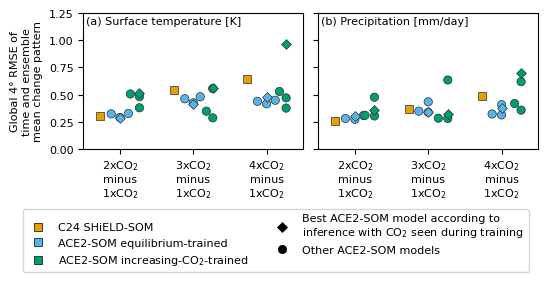

In [10]:
HUE_ORDER = {
    BASELINE: "C1",
    "ACE2-SOM-multi-climate": "C0",
    "ACE2-SOM-increasing-co2": "C2"
}
MARKER_SIZE = 6
CLIMATES = [f"{n}xCO$_2$\nminus\n1xCO$_2$" for n in range(2, 5)]


fig, (ax1, ax2) = faceted.faceted(
    1, 
    2, 
    aspect=0.618, 
    width=5.5, 
    internal_pad=0.15,
    left_pad=0.85,
    bottom_pad=1.4,
    top_pad=0.1,
    right_pad=0.1
)
sns.swarmplot(
    df[UNSELECTED_MASK], 
    ax=ax1, 
    x="climate", 
    y="surface_temperature",
    hue="configuration", 
    dodge=True, 
    legend=False,
    hue_order=HUE_ORDER.keys(),
    palette=HUE_ORDER.values(),
    linewidth=0.5,
    size=MARKER_SIZE
)
sns.swarmplot(
    df[SELECTED_MASK], 
    ax=ax1, 
    x="climate", 
    y="surface_temperature",
    hue="configuration", 
    dodge=True, 
    legend=False,
    hue_order=HUE_ORDER.keys(),
    palette=HUE_ORDER.values(),
    marker="D",
    size=5,
    linewidth=0.5,
)
sns.swarmplot(
    df[BASELINE_MASK], 
    ax=ax1, 
    x="climate", 
    y="surface_temperature",
    hue="configuration", 
    dodge=True, 
    legend=False,
    hue_order=HUE_ORDER.keys(),
    palette=HUE_ORDER.values(),
    marker="s",
    size=MARKER_SIZE,
    linewidth=0.5,
)
ax1.set_ylim(0, 1.25)


sns.swarmplot(
    df[UNSELECTED_MASK], 
    ax=ax2, 
    x="climate", 
    y="PRATEsfc",
    hue="configuration", 
    dodge=True, 
    legend=False,
    hue_order=HUE_ORDER.keys(),
    palette=HUE_ORDER.values(),
    linewidth=0.5,
    size=MARKER_SIZE
)
sns.swarmplot(
    df[SELECTED_MASK], 
    ax=ax2, 
    x="climate", 
    y="PRATEsfc",
    hue="configuration", 
    dodge=True, 
    legend=False,
    hue_order=HUE_ORDER.keys(),
    palette=HUE_ORDER.values(),
    marker="D",
    size=5,
    linewidth=0.5,
)
sns.swarmplot(
    df[BASELINE_MASK], 
    ax=ax2, 
    x="climate", 
    y="PRATEsfc",
    hue="configuration", 
    dodge=True, 
    legend=False,
    hue_order=HUE_ORDER.keys(),
    palette=HUE_ORDER.values(),
    marker="s",
    size=MARKER_SIZE,
    linewidth=0.5,
)
ax2.set_ylim(0, 1.25)

for ax in (ax1, ax2):
    ax.set_ylabel("Global 4° RMSE of\ntime and ensemble\nmean change pattern")
    ax.set_xlabel("")
    ax.set_xticklabels(CLIMATES)

ax1.annotate(
    "(a) Surface temperature [K]",
    xy=(0, 1), 
    xytext=(2, -2), 
    va="top", 
    xycoords="axes fraction",
    textcoords="offset points"
)
ax2.annotate(
    "(b) Precipitation [mm/day]",
    xy=(0, 1), 
    xytext=(2, -2), 
    va="top", 
    xycoords="axes fraction",
    textcoords="offset points"
)

configuration_handles = dummy_handles(
    ["C24 SHiELD-SOM", "ACE2-SOM equilibrium-trained", "ACE2-SOM increasing-CO$_2$-trained"],
    ["C1", "C0", "C2"],
    markersize=MARKER_SIZE,
    marker="s",
    markeredgewidth=0.5,
    markeredgecolor="k",
    linestyle="None"
)
best_model = dummy_handles(
    ["Best model"],
    ["k"],
    markersize=5,
    marker="D",
    markeredgewidth=0.5,
    markeredgecolor="k",
    linestyle="None"
)
other_models = dummy_handles(
    ["Other model"],
    ["k"],
    markersize=MARKER_SIZE,
    marker="o",
    markeredgewidth=0.5,
    markeredgecolor="k",
    linestyle="None"
)
ax1.legend(
    handles=configuration_handles + best_model + other_models,
    labels=["C24 SHiELD-SOM", "ACE2-SOM equilibrium-trained", "ACE2-SOM increasing-CO$_2$-trained", "Best ACE2-SOM model according to\ninference with CO$_2$ seen during training", "Other ACE2-SOM models"],
    bbox_to_anchor=(-0.3, -0.4), bbox_transform=ax1.transAxes, loc="upper left", ncol=2, fontsize=8
)
fig.savefig("figures/figure-11.png", dpi=200)
fig.savefig("figures/figure-11.pdf")